In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gamma = 0.95
nA = 4
nS = 9
p = 0.8

## Grid Game

In [3]:
#r1, r2, next_state, terminal: 0: up, 1: down, 2: right, 3: left
# Map = [
#         "CCG",012
#         "CCC",345
#         "SCC",678
#     ]
P = {
    0:{
        0:(-12, 10, 0, False),
        1:(-12, 10, 3, False),
        2:(-12, 10, 1, False),
        3:(-12, 10, 0, False)
    },
    1:{
        0:(-12, 10, 1, False),
        1:(-12, 10, 4, False),
        2:(-12, 10, 2, False),
        3:(-12, 10, 0, False)
    },
    2:{                        #Goal
        0:(5, 5, 9, True),
        1:(5, 5, 9, True),
        2:(5, 5, 9, True),
        3:(5, 5, 9, True)
    },
    3:{
        0:(-12, 10, 0, False),
        1:(-12, 10, 6, False),
        2:(-12, 10, 4, False),
        3:(-12, 10, 3, False)
    },
    4:{
        0:(-12, 10, 1, False),
        1:(-12, 10, 7, False),
        2:(-12, 10, 5, False),
        3:(-12, 10, 3, False)
    },
    5:{
        0:(-12, 10, 2, False),
        1:(-12, 10, 8, False),
        2:(-12, 10, 5, False),
        3:(-12, 10, 4, False)
    },
    6:{                        #Starting state
        0:(-12, 10, 3, False),
        1:(-12, 10, 6, False),
        2:(-12, 10, 7, False),
        3:(-12, 10, 6, False)
    },
    7:{
        0:(-12, 10, 4, False),
        1:(-12, 10, 7, False),
        2:(-12, 10, 8, False),
        3:(-12, 10, 6, False)
    },
    8:{
        0:(-12, 10, 5, False),
        1:(-12, 10, 8, False),
        2:(-12, 10, 8, False),
        3:(-12, 10, 7, False)
    },
    9:{                       #End of episode state
        0:(0, 0, 9, True),
        1:(0, 0, 9, True),
        2:(0, 0, 9, True),
        3:(0, 0, 9, True)
    }
}

In [4]:
def rewardnstate(a, s):
    r1, r2, state, terminal = P[s][a]
    reward = np.random.choice([r1, r2])
    return reward, state, terminal

def act_functn(Q, state, state_visits):
    #eps = 0.1
    #eps = 1/np.power(state_visits[state], 0.2)
    eps = 1/np.sqrt(state_visits[state])
    state_visits[state] += 1
    if np.random.choice([True, False], p=[1-eps, eps]):
        action = np.argmax(Q[state])
    else:
        action = np.random.choice(nA)
    return action

In [5]:
np.random.seed(2)
count_matrix_a = np.ones([nS, nA])
count_matrix_b = np.ones([nS, nA])
state_visits = np.ones(nS)
reward_list = []
maximal_value_a = []
maximal_value_b = []
cumsum = 0
count = 0
Qa = np.random.rand(nS+1, nA) #Random between -0.5 and 0.5
Qb = np.random.rand(nS+1, nA)
Qa[nS], Qb[nS] = 0, 0
for i in range(10000):
    state = 6
    terminal = True if state==2 else False
    while(not terminal):
        action = act_functn((Qa + Qb)/2, state, state_visits)
        reward, next_state, terminal = rewardnstate(action, state)
        cumsum += reward
        count += 1
        
        
        if np.random.choice([True, False]):#Qa
            alpha_a = (1/np.power(count_matrix_a[state, action], p))
            action_star = np.argmax(Qa[next_state])
            action_l = np.argmin(Qa[next_state])
            diff = np.abs(Qb[next_state, action_star]-Qb[next_state, action_l])
            beta_a = diff/(1000+diff)
            delta = reward + gamma*(beta_a*Qa[next_state, action_star]+(1-beta_a)*Qb[next_state, action_star])-Qa[state, action]
            Qa[state, action] += alpha_a*(delta)
            count_matrix_a[state, action] += 1
        else:
            alpha_b = (1/np.power(count_matrix_b[state, action], p))
            action_star = np.argmax(Qb[next_state])#Qb
            action_l = np.argmin(Qb[next_state])
            diff = np.abs(Qa[next_state, action_star]-Qa[next_state, action_l])
            beta_b = diff/(1000+diff)
            delta = reward + gamma*(beta_b*Qb[next_state, action_star]+(1-beta_b)*Qa[next_state, action_star])-Qb[state, action]
            Qb[state, action] += alpha_b*(delta)
            count_matrix_b[state, action] += 1

        
        state = next_state

    reward_list.append(cumsum/count)
    maximal_value_a.append(np.max(Qa[6]))
    maximal_value_b.append(np.max(Qb[6]))

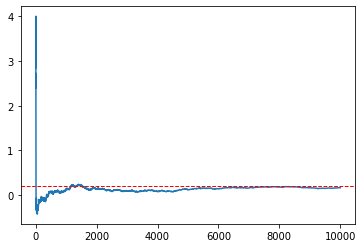

In [6]:
props = {
    "width": 1,
    "headwidth": 10
}
plt.plot(reward_list)#reward per step
plt.axhline(y = 0.2, color = "r", linestyle = "--", linewidth = 1)
#plt.annotate('y = %s' % round(reward_list[-1], 4), xy=(8000, reward_list[-1]), xytext=(9000, -0.2), arrowprops = props)
plt.show()

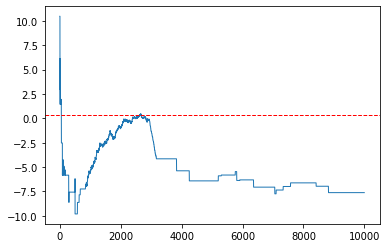

In [7]:
props = {
    "width": 1,
    "headwidth": 10
}

plt.plot(maximal_value_a, linewidth=1)
plt.axhline(y = 0.36, color = "r", linestyle = "--", linewidth = 1)
#plt.annotate('y = %s' % round(maximal_value_a[-1], 4), xy=(8000, maximal_value_a[-1]), xytext=(9000, -2), arrowprops = props)
plt.show()

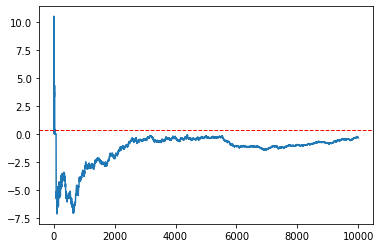

In [8]:
props = {
    "width": 1,
    "headwidth": 10
}
plt.plot(maximal_value_b)
plt.axhline(y = 0.36, color = "r", linestyle = "--", linewidth = 1)
#plt.annotate('y = %s' % round(maximal_value_b[-1], 4), xy=(300000, maximal_value_b[-1]), xytext=(350000, -2), arrowprops = props)
plt.annotate
plt.show()

In [9]:
np.mean(np.array(maximal_value_b) - 0.36), np.mean(np.array(maximal_value_a) - 0.36)

(-1.6427209818735333, -5.743614116382106)

In [10]:
np.mean(np.array(maximal_value_b[2000:]) - 0.36), np.mean(np.array(maximal_value_a[2000:]) - 0.36)

(-1.0899439163358833, -5.949006607380567)

## Bias Game

In [47]:
mu = -0.5
P = {
    0:{0: (0, 0, True)}, #state:{action: (reward, next state, terminal)}
    1:{0: (mu, 0, False),
       1: (mu, 0, False),
       2: (mu, 0, False),
       3: (mu, 0, False),
       4: (mu, 0, False),
       5: (mu, 0, False),
       6: (mu, 0, False),
       7: (mu, 0, False)}, 
    2:{0: (0, 1, False),
       1: (0, 0, False)}
}

In [48]:
def rewardnstate(a, s):
    r, state, terminal = P[s][a]
    if s==1:
        r = r + np.random.uniform(-1, 1)
    return r, state, terminal
  
def act_functn(Q, state, state_visits):
    #eps = 0.1
    #eps = 1/np.power(state_visits[state], 0.2)
    eps = 1/np.sqrt(state_visits[state])
    state_visits[state] += 1
    if np.random.choice([True, False], p=[1-eps, eps]):
        action = np.argmax(Q[state, :nAfes[state]])
    else:
        action = np.random.choice(nAfes[state])
    return action

In [49]:
np.random.seed(2)
nS = 3
nA = 8
count_matrix_a = np.ones([nS, nA])
count_matrix_b = np.ones([nS, nA])
state_visits = np.ones(nS)
reward_list = []
maximal_value_a = []
maximal_value_b = []
pref_list = []
cumsum = 0
count = 0
Qa = np.random.rand(nS, nA) #Random between -0.5 and 0.5
Qb = np.random.rand(nS, nA)
print("Qa", Qa)
print("Qb", Qb)
Qa[0], Qb[0] = 0, 0
nAfes = [1, 8, 2] #num_Actions_for_each_state
start_state = 2
for i in range(10000):
    state = start_state
    terminal = True if state==0 else False
    while(not terminal):
        action = act_functn((Qa + Qb)/2, state, state_visits)
        reward, next_state, terminal = rewardnstate(action, state)
        cumsum += reward
        count += 1
        
        
        if np.random.choice([True, False]):#Qa
            alpha_a = (1/np.power(count_matrix_a[state, action], p))
            action_star = np.argmax(Qa[next_state, :nAfes[next_state]])
            action_l = np.argmin(Qa[next_state, :nAfes[next_state]])
            diff = np.abs(Qb[next_state, action_star]-Qb[next_state, action_l])
            beta_a = diff/(1000+diff)
            delta = reward + gamma*(beta_a*Qa[next_state, action_star]
                                    + (1-beta_a)*Qb[next_state, action_star]) - Qa[state, action]
            Qa[state, action] += alpha_a*(delta)
            count_matrix_a[state, action] += 1
        else:
            alpha_b = (1/np.power(count_matrix_b[state, action], p))
            action_star = np.argmax(Qb[next_state])#Qb
            action_l = np.argmin(Qb[next_state])
            diff = np.abs(Qa[next_state, action_star]-Qa[next_state, action_l])
            beta_b = diff/(1000+diff)
            delta = reward + gamma*(beta_b*Qb[next_state, action_star]
                                    +(1-beta_b)*Qa[next_state, action_star])-Qb[state, action]
            Qb[state, action] += alpha_b*(delta)
            count_matrix_b[state, action] += 1

        
        state = next_state

    reward_list.append(cumsum/count)
    maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
    maximal_value_b.append(np.max(Qb[start_state, :nAfes[start_state]]))
    pref = .0
    pref += Qa[2][0] - Qa[2][1] #preference of left over right
    pref += Qb[2][0] - Qb[2][1] #preference of left over right
    pref /= float(2)
    pref_list.append(pref)

Qa [[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678  0.33033482
  0.20464863 0.61927097]
 [0.29965467 0.26682728 0.62113383 0.52914209 0.13457995 0.51357812
  0.18443987 0.78533515]
 [0.85397529 0.49423684 0.84656149 0.07964548 0.50524609 0.0652865
  0.42812233 0.09653092]]
Qb [[0.12715997 0.59674531 0.226012   0.10694568 0.22030621 0.34982629
  0.46778748 0.20174323]
 [0.64040673 0.48306984 0.50523672 0.38689265 0.79363745 0.58000418
  0.1622986  0.70075235]
 [0.96455108 0.50000836 0.88952006 0.34161365 0.56714413 0.42754596
  0.43674726 0.77655918]]


In [50]:
Qa, Qb

(array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [-0.64365814, -1.1710363 , -0.30636252, -0.34622368, -0.69977382,
         -0.59849912, -1.22434317, -0.49780521],
        [-0.61080496,  0.        ,  0.84656149,  0.07964548,  0.50524609,
          0.0652865 ,  0.42812233,  0.09653092]]),
 array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [-0.5058524 , -0.39666306, -0.73985695, -0.67112741, -0.36115245,
         -0.17497917,  0.1622986 , -1.2344936 ],
        [-1.12886355,  0.        ,  0.88952006,  0.34161365,  0.56714413,
          0.42754596,  0.43674726,  0.77655918]]))

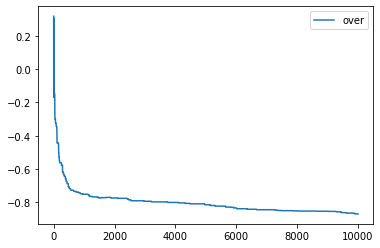

In [51]:
plt.plot(pref_list, label = "over")
plt.legend()

In [52]:
np.mean(pref_list[2000:]) + 0.5

-0.3270166973573728

In [29]:
Qb

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.19899364, -0.01995643, -0.20838746, -0.3196425 , -0.14248133,
         0.02404145,  0.43674726,  0.40838447],
       [-0.45863034,  0.        ,  0.54420816,  0.08209492,  0.3663424 ,
         0.8508505 ,  0.40627504,  0.02720237],
       [ 0.24717724,  0.06714437,  0.99385201,  0.97058031,  0.80025835,
         0.60181712,  0.76495986,  0.16922545]])